In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing data for a camping

In [5]:
from collections import defaultdict

camping = 'GAVINA'

df = pd.read_excel('database/database 2009 - 2019/RESA_2019.xlsx')
df_camping = df[df['camping_label'] == camping]


# Getting dates

In [6]:
season = pd.date_range(start=min(df_camping['datein']),end=max(df_camping['dateout']))
season

DatetimeIndex(['2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08',
               '2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12',
               '2019-04-13', '2019-04-14',
               ...
               '2019-10-25', '2019-10-26', '2019-10-27', '2019-10-28',
               '2019-10-29', '2019-10-30', '2019-10-31', '2019-11-01',
               '2019-11-02', '2019-11-03'],
              dtype='datetime64[ns]', length=213, freq='D')

# Creating dictionaries for price, average price, nb_customers, occupancy, 

In [8]:
dict_dates_price = defaultdict(int)
dict_dates_avg_price = defaultdict(int)
dict_dates_n_cust = defaultdict(int)
dict_dates_oc = defaultdict(int)
dict_dates_ratio = defaultdict(int)

for date in season:
    dict_dates_price[date] = 0
    dict_dates_avg_price[date] = 0
    dict_dates_n_cust[date] = 0
    dict_dates_oc[date] = 0
    dict_dates_ratio[date] = 0

In [10]:
for index in df_camping.index:
    for j in range(int(df_camping['los'][index])):
        dict_dates_price[pd.Timestamp(df_camping['datein'][index]) + pd.DateOffset(days=j)] += df_camping['rev'][index]/int(df_camping['los'][index])
        dict_dates_n_cust[pd.Timestamp(df_camping['datein'][index]) + pd.DateOffset(days=j)] += 1

In [11]:
for e in dict_dates_price:
    try:
        dict_dates_avg_price[e] = dict_dates_price[e]/dict_dates_n_cust[e]
    except:
        pass
    
MAX = max(list(dict_dates_n_cust.values()))
          
for f in dict_dates_oc:
    try:
        dict_dates_oc[f] = dict_dates_n_cust[f]/MAX*100
    except:
        pass

In [12]:
plt.figure(figsize=(15,10))
date_price = list(dict_dates_avg_price.keys())
date_oc = list(dict_dates_oc.keys())
avg_price = list(dict_dates_avg_price.values())
occupancy = list(dict_dates_oc.values())

df_price = pd.DataFrame(date_price)
df_occupancy = pd.DataFrame(date_oc)

df_price['average price'] = avg_price
df_occupancy['occupancy'] = occupancy
df_price = df_price.set_index(0)
df_occupancy = df_occ_oc.set_index(0)
plt.plot(df_price['average price'], label='average price')
plt.legend()

plt.figure(figsize=(15,10))
plt.plot(df_occupancy['occupancy'], label = 'occupancy')
plt.legend()



NameError: name 'df_occ_oc' is not defined

<Figure size 1080x720 with 0 Axes>

In [25]:
dict_dates_avg_price = defaultdict(int)
for date in season:
    dict_dates_avg_price[date] = 0
    
for e in dict_dates_price:
    try:
        dict_dates_avg_price[e] = dict_dates_price[e]/dict_dates_n_cust[e]
    except:
        pass

In [15]:
df_avg_price = pd.DataFrame.from_dict(dict_dates_avg_price, orient='index', columns = ['average price'])
df_occupancy = pd.DataFrame.from_dict(dict_dates_oc, orient='index', columns = ['occupancy'])

In [16]:
df_all = df_avg_price.merge(df_occupancy, left_index = True, right_index = True)

In [17]:
df_all

,average price,occupancy
2019-04-05,26.094837,6.037736
2019-04-06,24.732586,26.415094
2019-04-07,22.830698,26.415094
2019-04-08,23.047379,27.169811
2019-04-09,23.372225,27.924528
...,...,...
2019-10-30,22.510157,24.905660
2019-10-31,21.829319,25.660377
2019-11-01,25.810050,27.924528
2019-11-02,23.361503,26.037736


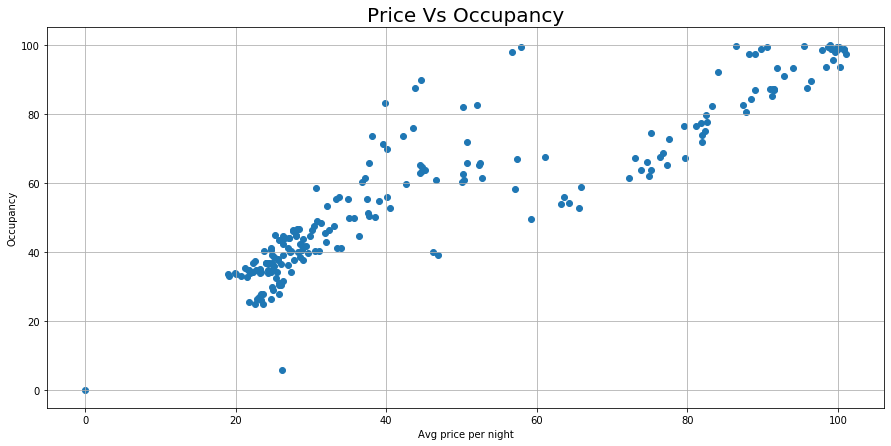

In [24]:
plt.figure(figsize=(15, 7))
plt.scatter(df_all['average price'], df_all['occupancy'])
plt.title('Price Vs Occupancy', fontsize=20)
plt.xlabel("Avg price per night")
plt.ylabel("Occupancy")
plt.grid()

# Same operation, for customers who reserved 100 days before start of vacation, on all campings

In [72]:
from datetime import datetime as dt
df['nb_days_between_resa_start'] = (df['datein'] - df['resdate']).dt.days

In [71]:
df['nb_days_between_resa_start']

0           0.0
1         223.0
2         178.0
3         239.0
4         199.0
          ...  
339926      0.0
339927    189.0
339928    139.0
339929      1.0
339930    115.0
Name: nb_days_between_resa_start, Length: 339931, dtype: float64

In [73]:
df_early_booking_100 = df[df['nb_days_between_resa_start'] > 100]
df_early_booking_100

,idstay,idstay_to,type_stay_lbl,resinternet,type_guest,extract_date,resdate,camping_code,camping_label,Région,...,region,fidelisation,date_fid,creation_date,segment,scode1,scode2,hébergement entreprise id,hébergement entreprise lbl,nb_days_between_resa_start
1,811-48,NaN,INDIV DIRECT,O20181125ALLEM17399228,N,2019-08-27,2018-11-27,66.0,LES 4 MONTAGNES,Rhône-Alpes,...,NaN,Oui,2017-01-01,2017-03-21,Internet,Yelloh,Site marchand,1.0,Emplacement **,223.0
2,811-231,NaN,INDIV DIRECT,U20190131TARDI559448242,N,2019-08-15,2019-01-31,66.0,LES 4 MONTAGNES,Rhône-Alpes,...,NaN,Oui,2016-01-01,2015-11-01,DIRECT,Village,Village,1.0,Emplacement **,178.0
3,811-91,NaN,INDIV DIRECT,O20181214BOSCH70772019,N,2019-08-19,2018-12-16,66.0,LES 4 MONTAGNES,Rhône-Alpes,...,NaN,Non,2015-11-01,2018-12-17,Internet,Yelloh,Site marchand,3.0,Cottage Alpes7p 3ch 2sdb ****,239.0
4,811-204,NaN,INDIV DIRECT,O20190124BIANC48892450,N,2019-08-18,2019-01-24,66.0,LES 4 MONTAGNES,Rhône-Alpes,...,NaN,Oui,2015-11-01,2015-11-01,Internet,Yelloh,Site marchand,12.0,Cottage Summer 4p 2ch ***,199.0
6,811-180,NaN,INDIV DIRECT,O20190120BONT536721684,N,2019-07-28,2019-01-20,66.0,LES 4 MONTAGNES,Rhône-Alpes,...,NaN,Non,2015-11-01,2019-01-20,Internet,Yelloh,Site marchand,1.0,Emplacement **,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339915,809-1095,NaN,INDIV DIRECT,O20181230LANGE49285652,N,2019-08-31,2018-12-31,1.0,SOLEIL VIVARAIS,Rhône-Alpes,...,NaN,Oui,2018-01-01,2018-12-30,Internet,Yelloh,Site marchand,9.0,Cottage 4p 2ch 1sdb**** clim,234.0
339916,809-1108,NaN,INDIV DIRECT,O20181230ROSMA48859455,N,2019-08-18,2018-12-31,1.0,SOLEIL VIVARAIS,Rhône-Alpes,...,NaN,Oui,2018-01-01,2017-12-02,Internet,Yelloh,Site marchand,20.0,Cottage 6p 3ch *** clim,223.0
339927,809-1283,NaN,INDIV DIRECT,O20190106FOLKE30121719,N,2019-07-31,2019-01-07,1.0,SOLEIL VIVARAIS,Rhône-Alpes,...,NaN,Non,2015-11-01,2019-01-07,Internet,Yelloh,Site marchand,1.0,Emplacement Camping **,189.0
339928,809-4164,NaN,INDIV DIRECT,O20190415JEAN149222316,N,2019-09-10,2019-04-16,1.0,SOLEIL VIVARAIS,Rhône-Alpes,...,NaN,Oui,2020-01-01,2019-04-16,Internet,Yelloh,Site marchand,13.0,Cottage 4p 2ch 2sdb **** clim,139.0


In [74]:
dict_dates_price = defaultdict(int)
dict_dates_avg_price = defaultdict(int)
dict_dates_n_cust = defaultdict(int)
dict_dates_oc = defaultdict(int)
dict_dates_ratio = defaultdict(int)

for date in season:
    dict_dates_price[date] = 0
    dict_dates_avg_price[date] = 0
    dict_dates_n_cust[date] = 0
    dict_dates_oc[date] = 0
    dict_dates_ratio[date] = 0

In [76]:
for index in df_early_booking_100.index:
    for j in range(int(df_early_booking_100['los'][index])):
        dict_dates_price[pd.Timestamp(df_early_booking_100['datein'][index]) + pd.DateOffset(days=j)] += df_early_booking_100['rev'][index]/int(df_early_booking_100['los'][index])
        dict_dates_n_cust[pd.Timestamp(df_early_booking_100['datein'][index]) + pd.DateOffset(days=j)] += 1

In [77]:
for e in dict_dates_price:
    try:
        dict_dates_avg_price[e] = dict_dates_price[e]/dict_dates_n_cust[e]
    except:
        pass
    
MAX = max(list(dict_dates_n_cust.values()))
          
for f in dict_dates_oc:
    try:
        dict_dates_oc[f] = dict_dates_n_cust[f]/MAX*100
    except:
        pass

In [78]:
dict_dates_avg_price = defaultdict(int)
for date in season:
    dict_dates_avg_price[date] = 0
    
for e in dict_dates_price:
    try:
        dict_dates_avg_price[e] = dict_dates_price[e]/dict_dates_n_cust[e]
    except:
        pass

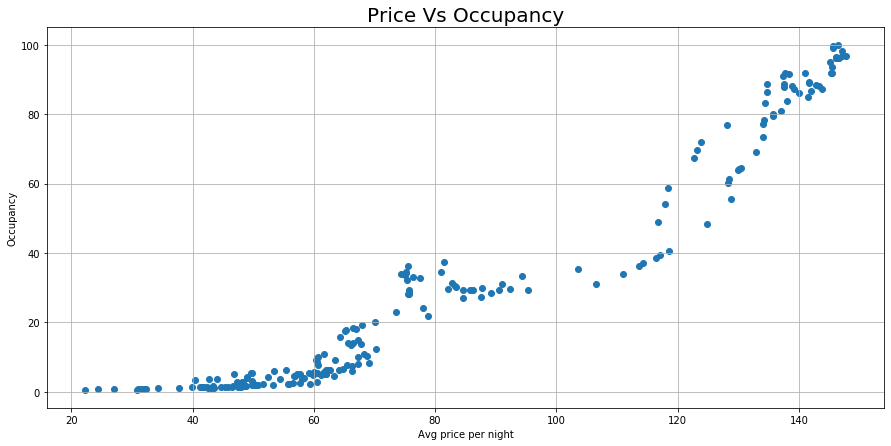

In [79]:
df_avg_price = pd.DataFrame.from_dict(dict_dates_avg_price, orient='index', columns = ['average price'])
df_occupancy = pd.DataFrame.from_dict(dict_dates_oc, orient='index', columns = ['occupancy'])

df_all = df_avg_price.merge(df_occupancy, left_index = True, right_index = True)

plt.figure(figsize=(15, 7))
plt.scatter(df_all['average price'], df_all['occupancy'])
plt.title('Price Vs Occupancy', fontsize=20)
plt.xlabel("Avg price per night")
plt.ylabel("Occupancy")
plt.grid()

# Early customers (at least 100 days), in a specific camping

Filtering to one camping, one period of time, and one type of customers

In [382]:
camping = 'GAVINA'

df_camping = df[df['camping_label'] == camping]

In [364]:
dict_dates_oc = defaultdict(int)
dict_dates_n_cust_total = defaultdict(int)

for date in season:
    dict_dates_n_cust_total[date] = 0
    dict_dates_oc[date] = 0

for index in df_camping.index:
    for j in range(int(df_camping['los'][index])):
        dict_dates_n_cust_total[pd.Timestamp(df_camping['datein'][index]) + pd.DateOffset(days=j)] += 1

MAX = max(list(dict_dates_n_cust_total.values()))
        
for f in dict_dates_oc:
    try:
        dict_dates_oc[f] = dict_dates_n_cust_total[f]/MAX*100
    except:
        pass

In [365]:
dict_dates_oc

defaultdict(int,
            {Timestamp('2019-04-05 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-06 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-07 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-08 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-09 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-10 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-11 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-12 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-13 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-14 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-15 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-16 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-17 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-18 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-19 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-20 00:00:00', freq='D

Filtering to a specific periof and a specific type of customers (number of days they reserved before vacation)

In [366]:
min_nb_days_between_booking_and_vacation = 100
max_nb_days_between_booking_and_vacation = 400
year = str(df['datein'].dt.year.unique()[0]).split('.')[0]
    
start_date = year + '-06-01'
end_date = year + '-09-30'

df = df[df['datein'] > start_date]
df = df[df['datein'] < end_date]

df_camping_early_booking = df_camping[df_camping['nb_days_between_resa_start'] > min_nb_days_between_booking_and_vacation]
df_camping_early_booking = df_camping[df_camping['nb_days_between_resa_start'] < max_nb_days_between_booking_and_vacation]
df_camping_early_booking

,idstay,idstay_to,type_stay_lbl,resinternet,type_guest,extract_date,resdate,camping_code,camping_label,Région,...,region,fidelisation,date_fid,creation_date,segment,scode1,scode2,hébergement entreprise id,hébergement entreprise lbl,nb_days_between_resa_start
330670,885-9603,NaN,INDIV DIRECT,U20190804EMERI442691040,N,2019-08-08,2019-08-04,109.0,GAVINA,Espagne,...,NaN,Oui,2015-11-01,2015-11-01,DIRECT,Village,Village,3.0,Parcela 2p * Frente de Mar 2Âª LÃ­nea,3.0
330671,885-8406,NaN,INDIV DIRECT,O20190621SANSB22042152,N,2019-07-05,2019-06-21,109.0,GAVINA,Espagne,...,NaN,Non,2015-11-01,2019-06-21,Internet,Village,Thelis,15.0,CabaÃ±a Pl 5p 2Hab ** Vista al Mar,10.0
330672,885-8733,NaN,INDIV DIRECT,U20190703HOFFM837841796,N,2019-08-05,2019-07-03,109.0,GAVINA,Espagne,...,NaN,Oui,2018-01-01,2017-10-27,DIRECT,Village,Village,3.0,Parcela 2p * Frente de Mar 2Âª LÃ­nea,2.0
330673,885-10543,NaN,INDIV DIRECT,U20190907BRAUN662774658,N,2019-09-08,2019-09-07,109.0,GAVINA,Espagne,...,NaN,Non,2015-11-01,2019-02-18,DIRECT,Village,Village,1.0,Parcela 2p * 3Âª LÃ­nea,0.0
330674,885-10749,NaN,INDIV DIRECT,U20190921KLEPE446865844,N,2019-09-23,2019-09-21,109.0,GAVINA,Espagne,...,NaN,Non,2000-01-01,2015-11-01,DIRECT,Village,Village,3.0,Parcela 2p * Frente de Mar 2Âª LÃ­nea,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335647,885-8023,NaN,INDIV DIRECT,U20190607PASCA102279663,N,2019-08-05,2019-06-07,109.0,GAVINA,Espagne,...,NaN,Non,2000-01-01,2015-11-01,DIRECT,Village,Village,19.0,Tiny Home 4p 1Hab+entresuelo***,0.0
335649,885-7083,NaN,INDIV DIRECT,O20190429CREYS37481236,N,2019-09-16,2019-04-29,109.0,GAVINA,Espagne,...,NaN,Oui,2016-01-01,2015-11-01,Internet,Yelloh,Site marchand,11.0,Chalet Beach 4/5p 2Hab ***,137.0
335651,885-7407,NaN,INDIV DIRECT,U20190514VARGA917877197,N,2019-08-05,2019-05-14,109.0,GAVINA,Espagne,...,NaN,Oui,2018-01-01,2017-10-27,DIRECT,Village,Village,20.0,Parcela 2p ** Frente de Mar 2Âª LÃ­nea,24.0
335653,885-7306,NaN,INDIV DIRECT,O20190510SOLE561154184,N,2019-06-30,2019-05-11,109.0,GAVINA,Espagne,...,NaN,Non,2015-11-01,2019-05-11,Internet,Yelloh,Site marchand,19.0,Tiny Home 4p 1Hab+entresuelo***,48.0


In [367]:
print(f'Camping {camping} had a maximum of {MAX} customers the year {year}')

Camping GAVINA had a maximum of 216 customers the year 2019


In [368]:
dict_dates_price = defaultdict(int)
dict_dates_avg_price = defaultdict(int)
dict_dates_ratio = defaultdict(int)
dict_dates_n_cust_filtered = defaultdict(int)

for date in season:
    dict_dates_price[date] = 0
    dict_dates_avg_price[date] = 0
    dict_dates_ratio[date] = 0
    dict_dates_n_cust_filtered[date]= 0

for index in df_camping_early_booking.index:
    for j in range(int(df_camping_early_booking['los'][index])):
        dict_dates_price[pd.Timestamp(df_camping_early_booking['datein'][index]) + pd.DateOffset(days=j)] += df_camping_early_booking['rev'][index]/int(df_camping_early_booking['los'][index])
        dict_dates_n_cust_filtered[pd.Timestamp(df_camping_early_booking['datein'][index]) + pd.DateOffset(days=j)] += 1
        

In [369]:
dict_dates_avg_price = defaultdict(int)

for date in season:
    dict_dates_avg_price[date] = 0
    
for e in dict_dates_price:
    try:
        dict_dates_avg_price[e] = dict_dates_price[e]/dict_dates_n_cust_filtered[e]
    except:
        pass

In [370]:
dict_dates_oc

defaultdict(int,
            {Timestamp('2019-04-05 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-06 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-07 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-08 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-09 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-10 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-11 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-12 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-13 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-14 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-15 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-16 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-17 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-18 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-19 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-20 00:00:00', freq='D

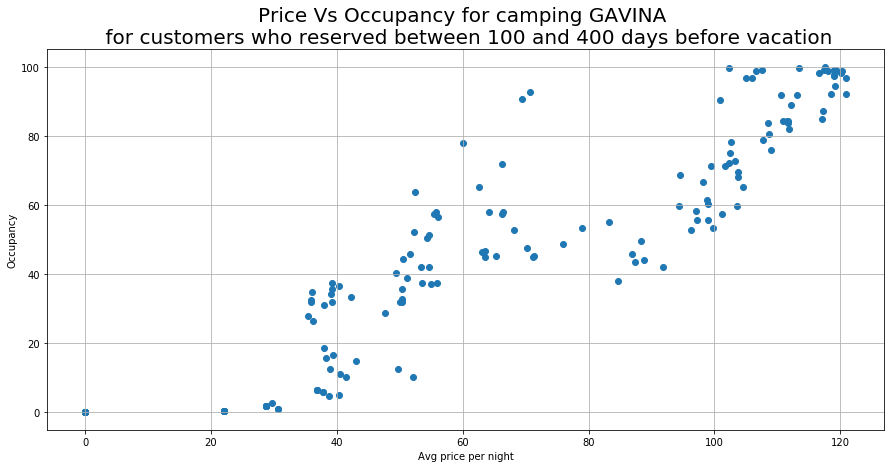

In [341]:
df_avg_price = pd.DataFrame.from_dict(dict_dates_avg_price, orient='index', columns = ['average price'])
df_occupancy = pd.DataFrame.from_dict(dict_dates_oc, orient='index', columns = ['occupancy'])

df_all = df_avg_price.merge(df_occupancy, left_index = True, right_index = True)

plt.figure(figsize=(15, 7))
plt.scatter(df_all['average price'], df_all['occupancy'])
plt.title(f'Price Vs Occupancy for camping {camping} \n \
for customers who reserved between {min_nb_days_between_booking_and_vacation} and {max_nb_days_between_booking_and_vacation} days before vacation', fontsize=20)
plt.xlabel("Avg price per night")
plt.ylabel("Occupancy")
plt.grid()

# Other camping:

In [393]:
camping = 'SERIGNAN PLAGE'

df_camping = df[df['camping_label'] == camping]

In [394]:
dict_dates_oc = defaultdict(int)
dict_dates_n_cust_total = defaultdict(int)

for date in season:
    dict_dates_n_cust_total[date] = 0
    dict_dates_oc[date] = 0

for index in df_camping.index:
    for j in range(int(df_camping['los'][index])):
        dict_dates_n_cust_total[pd.Timestamp(df_camping['datein'][index]) + pd.DateOffset(days=j)] += 1

MAX = max(list(dict_dates_n_cust_total.values()))
        
for f in dict_dates_oc:
    try:
        dict_dates_oc[f] = dict_dates_n_cust_total[f]/MAX*100
    except:
        pass

In [395]:
dict_dates_oc

defaultdict(int,
            {Timestamp('2019-04-05 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-06 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-07 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-08 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-09 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-10 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-11 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-12 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-13 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-14 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-15 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-16 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-17 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-18 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-19 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-20 00:00:00', freq='D

In [349]:
min_nb_days_between_booking_and_vacation = 0
max_nb_days_between_booking_and_vacation = 15
year = str(df['datein'].dt.year.unique()[0]).split('.')[0]
    
start_date = year + '-06-01'
end_date = year + '-09-30'

df = df[df['datein'] > start_date]
df = df[df['datein'] < end_date]

df_camping_early_booking = df_camping[df_camping['nb_days_between_resa_start'] > min_nb_days_between_booking_and_vacation]
df_camping_early_booking = df_camping[df_camping['nb_days_between_resa_start'] < max_nb_days_between_booking_and_vacation]
df_camping_early_booking

,idstay,idstay_to,type_stay_lbl,resinternet,type_guest,extract_date,resdate,camping_code,camping_label,Région,...,region,fidelisation,date_fid,creation_date,segment,scode1,scode2,hébergement entreprise id,hébergement entreprise lbl,nb_days_between_resa_start
916,805-22413,NaN,INDIV DIRECT,U20190912GALLE721853637,N,2019-09-13,2019-09-12,18.0,SERIGNAN PLAGE,Languedoc,...,NaN,Non,2015-11-01,2019-09-07,DIRECT,Village,Village,2.0,Forfait Plage 2p **,0.0
1777,805-22141,NaN,INDIV DIRECT,U20190907RIFFA595208740,N,2019-09-07,2019-09-07,18.0,SERIGNAN PLAGE,Languedoc,...,NaN,Oui,2015-11-01,2015-11-01,DIRECT,Village,Village,4.0,Forfait Phare Ouest 2p **,0.0
1780,805-22129,NaN,INDIV DIRECT,O20190907CHENE16611293,N,2019-09-20,2019-09-07,18.0,SERIGNAN PLAGE,Languedoc,...,NaN,Oui,2019-01-01,2015-11-01,Internet,Yelloh,Site marchand,15.0,Cottage Patio 7p 3ch **** clim,9.0
1781,805-22145,NaN,INDIV DIRECT,U20190907HAWKE689498901,N,2019-09-07,2019-09-07,18.0,SERIGNAN PLAGE,Languedoc,...,NaN,Non,2015-11-01,2019-09-07,DIRECT,Village,Village,2.0,Forfait Plage 2p **,0.0
1784,805-21856,NaN,INDIV DIRECT,U20190901HAMMA119253540,N,2019-09-09,2019-09-01,18.0,SERIGNAN PLAGE,Languedoc,...,NaN,Non,2015-11-01,2015-11-01,DIRECT,Village,Village,5.0,NR Forfait ** Plage,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283742,805-16896,NaN,INDIV DIRECT,U20190603BUCKE553268432,N,2019-06-10,2019-06-03,18.0,SERIGNAN PLAGE,Languedoc,...,NaN,Oui,2017-01-01,2015-11-01,DIRECT,Village,Village,17.0,Forfait Phare Ouest *** 2p + 10A + eau,5.0
283743,805-18244,NaN,INDIV DIRECT,U20190702STACH550988769,N,2019-07-02,2019-07-02,18.0,SERIGNAN PLAGE,Languedoc,...,NaN,Oui,2015-11-01,2015-11-01,DIRECT,Village,Village,2.0,Forfait Plage 2p **,0.0
283745,805-21118,NaN,INDIV DIRECT,U20190818PELZE327224731,N,2019-08-21,2019-08-18,18.0,SERIGNAN PLAGE,Languedoc,...,NaN,Non,2015-11-01,2019-07-12,DIRECT,Village,Village,5.0,NR Forfait ** Plage,1.0
283746,805-22933,NaN,INDIV DIRECT,U20190925REINH235379028,N,2019-09-26,2019-09-25,18.0,SERIGNAN PLAGE,Languedoc,...,NaN,Non,2015-11-01,2019-09-25,DIRECT,Village,Village,2.0,Forfait Plage 2p **,0.0


In [357]:
print(f'Camping is open {MAX} days the season {year}')

Camping is open 751 days the season 2019


In [351]:
dict_dates_price = defaultdict(int)
dict_dates_avg_price = defaultdict(int)
dict_dates_ratio = defaultdict(int)
dict_dates_n_cust_filtered = defaultdict(int)

for date in season:
    dict_dates_price[date] = 0
    dict_dates_avg_price[date] = 0
    dict_dates_ratio[date] = 0
    dict_dates_n_cust_filtered[date]= 0

for index in df_camping_early_booking.index:
    for j in range(int(df_camping_early_booking['los'][index])):
        dict_dates_price[pd.Timestamp(df_camping_early_booking['datein'][index]) + pd.DateOffset(days=j)] += df_camping_early_booking['rev'][index]/int(df_camping_early_booking['los'][index])
        dict_dates_n_cust_filtered[pd.Timestamp(df_camping_early_booking['datein'][index]) + pd.DateOffset(days=j)] += 1
        

In [352]:
dict_dates_avg_price = defaultdict(int)

for date in season:
    dict_dates_avg_price[date] = 0
    
for e in dict_dates_price:
    try:
        dict_dates_avg_price[e] = dict_dates_price[e]/dict_dates_n_cust_filtered[e]
    except:
        pass

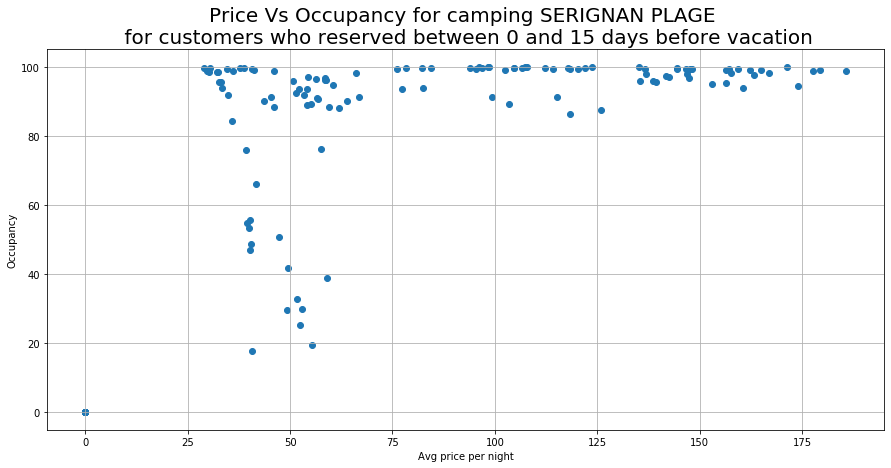

In [353]:
df_avg_price = pd.DataFrame.from_dict(dict_dates_avg_price, orient='index', columns = ['average price'])
df_occupancy = pd.DataFrame.from_dict(dict_dates_oc, orient='index', columns = ['occupancy'])

df_all = df_avg_price.merge(df_occupancy, left_index = True, right_index = True)

plt.figure(figsize=(15, 7))
plt.scatter(df_all['average price'], df_all['occupancy'])
plt.title(f'Price Vs Occupancy for camping {camping} \n \
for customers who reserved between {min_nb_days_between_booking_and_vacation} and {max_nb_days_between_booking_and_vacation} days before vacation', fontsize=20)
plt.xlabel("Avg price per night")
plt.ylabel("Occupancy")
plt.grid()

# Applying it to all years:

In [372]:
df_2009 = pd.read_excel('database/database 2009 - 2019/RESA_2009.xlsx')
df_2010 = pd.read_excel('database/database 2009 - 2019/RESA_2010.xlsx')
df_2011 = pd.read_excel('database/database 2009 - 2019/RESA_2011.xlsx')
df_2012 = pd.read_excel('database/database 2009 - 2019/RESA_2012.xlsx')
df_2013 = pd.read_excel('database/database 2009 - 2019/RESA_2013.xlsx')
df_2014 = pd.read_excel('database/database 2009 - 2019/RESA_2014.xlsx')
df_2015 = pd.read_excel('database/database 2009 - 2019/RESA_2015.xlsx')
df_2016 = pd.read_excel('database/database 2009 - 2019/RESA_2016.xlsx')
df_2017 = pd.read_excel('database/database 2009 - 2019/RESA_2017.xlsx')
df_2018 = pd.read_excel('database/database 2009 - 2019/RESA_2018.xlsx')

In [374]:
df_all = pd.concat([df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df], axis=0)

In [375]:
df_all.shape

(2641008, 44)

# Same method as previously, but applied to all years: (TO BE DONE)

In [385]:
camping = 'SERIGNAN PLAGE'

df_camping = df_all[df_all['camping_label'] == camping]

In [390]:
df_camping.los = df_camping.los.astype('int')

/opt/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [356]:
dict_dates_oc

defaultdict(int,
            {Timestamp('2019-04-05 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-06 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-07 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-08 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-09 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-10 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-11 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-12 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-13 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-14 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-15 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-16 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-17 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-18 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-19 00:00:00', freq='D'): 0.0,
             Timestamp('2019-04-20 00:00:00', freq='D

In [ ]:
dict_dates_oc = defaultdict(int)
dict_dates_n_cust_total = defaultdict(int)

for date in season:
    dict_dates_n_cust_total[date] = 0
    dict_dates_oc[date] = 0

for index in df_camping.index:
    for j in range(int(df_camping['los'][index])):
        dict_dates_n_cust_total[pd.Timestamp(df_camping['datein'][index]) + pd.DateOffset(days=j)] += 1

MAX = max(list(dict_dates_n_cust_total.values()))
        
for f in dict_dates_oc:
    try:
        dict_dates_oc[f] = dict_dates_n_cust_total[f]/MAX*100
    except:
        pass

In [349]:
min_nb_days_between_booking_and_vacation = 0
max_nb_days_between_booking_and_vacation = 15
year = str(df['datein'].dt.year.unique()[0]).split('.')[0]
    
start_date = year + '-06-01'
end_date = year + '-09-30'

df = df[df['datein'] > start_date]
df = df[df['datein'] < end_date]

df_camping_early_booking = df_camping[df_camping['nb_days_between_resa_start'] > min_nb_days_between_booking_and_vacation]
df_camping_early_booking = df_camping[df_camping['nb_days_between_resa_start'] < max_nb_days_between_booking_and_vacation]
df_camping_early_booking

,idstay,idstay_to,type_stay_lbl,resinternet,type_guest,extract_date,resdate,camping_code,camping_label,Région,...,region,fidelisation,date_fid,creation_date,segment,scode1,scode2,hébergement entreprise id,hébergement entreprise lbl,nb_days_between_resa_start
916,805-22413,NaN,INDIV DIRECT,U20190912GALLE721853637,N,2019-09-13,2019-09-12,18.0,SERIGNAN PLAGE,Languedoc,...,NaN,Non,2015-11-01,2019-09-07,DIRECT,Village,Village,2.0,Forfait Plage 2p **,0.0
1777,805-22141,NaN,INDIV DIRECT,U20190907RIFFA595208740,N,2019-09-07,2019-09-07,18.0,SERIGNAN PLAGE,Languedoc,...,NaN,Oui,2015-11-01,2015-11-01,DIRECT,Village,Village,4.0,Forfait Phare Ouest 2p **,0.0
1780,805-22129,NaN,INDIV DIRECT,O20190907CHENE16611293,N,2019-09-20,2019-09-07,18.0,SERIGNAN PLAGE,Languedoc,...,NaN,Oui,2019-01-01,2015-11-01,Internet,Yelloh,Site marchand,15.0,Cottage Patio 7p 3ch **** clim,9.0
1781,805-22145,NaN,INDIV DIRECT,U20190907HAWKE689498901,N,2019-09-07,2019-09-07,18.0,SERIGNAN PLAGE,Languedoc,...,NaN,Non,2015-11-01,2019-09-07,DIRECT,Village,Village,2.0,Forfait Plage 2p **,0.0
1784,805-21856,NaN,INDIV DIRECT,U20190901HAMMA119253540,N,2019-09-09,2019-09-01,18.0,SERIGNAN PLAGE,Languedoc,...,NaN,Non,2015-11-01,2015-11-01,DIRECT,Village,Village,5.0,NR Forfait ** Plage,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283742,805-16896,NaN,INDIV DIRECT,U20190603BUCKE553268432,N,2019-06-10,2019-06-03,18.0,SERIGNAN PLAGE,Languedoc,...,NaN,Oui,2017-01-01,2015-11-01,DIRECT,Village,Village,17.0,Forfait Phare Ouest *** 2p + 10A + eau,5.0
283743,805-18244,NaN,INDIV DIRECT,U20190702STACH550988769,N,2019-07-02,2019-07-02,18.0,SERIGNAN PLAGE,Languedoc,...,NaN,Oui,2015-11-01,2015-11-01,DIRECT,Village,Village,2.0,Forfait Plage 2p **,0.0
283745,805-21118,NaN,INDIV DIRECT,U20190818PELZE327224731,N,2019-08-21,2019-08-18,18.0,SERIGNAN PLAGE,Languedoc,...,NaN,Non,2015-11-01,2019-07-12,DIRECT,Village,Village,5.0,NR Forfait ** Plage,1.0
283746,805-22933,NaN,INDIV DIRECT,U20190925REINH235379028,N,2019-09-26,2019-09-25,18.0,SERIGNAN PLAGE,Languedoc,...,NaN,Non,2015-11-01,2019-09-25,DIRECT,Village,Village,2.0,Forfait Plage 2p **,0.0


In [357]:
print(f'Camping is open {MAX} days the season {year}')

Camping is open 751 days the season 2019


In [351]:
dict_dates_price = defaultdict(int)
dict_dates_avg_price = defaultdict(int)
dict_dates_ratio = defaultdict(int)
dict_dates_n_cust_filtered = defaultdict(int)

for date in season:
    dict_dates_price[date] = 0
    dict_dates_avg_price[date] = 0
    dict_dates_ratio[date] = 0
    dict_dates_n_cust_filtered[date]= 0

for index in df_camping_early_booking.index:
    for j in range(int(df_camping_early_booking['los'][index])):
        dict_dates_price[pd.Timestamp(df_camping_early_booking['datein'][index]) + pd.DateOffset(days=j)] += df_camping_early_booking['rev'][index]/int(df_camping_early_booking['los'][index])
        dict_dates_n_cust_filtered[pd.Timestamp(df_camping_early_booking['datein'][index]) + pd.DateOffset(days=j)] += 1
        

In [352]:
dict_dates_avg_price = defaultdict(int)

for date in season:
    dict_dates_avg_price[date] = 0
    
for e in dict_dates_price:
    try:
        dict_dates_avg_price[e] = dict_dates_price[e]/dict_dates_n_cust_filtered[e]
    except:
        pass

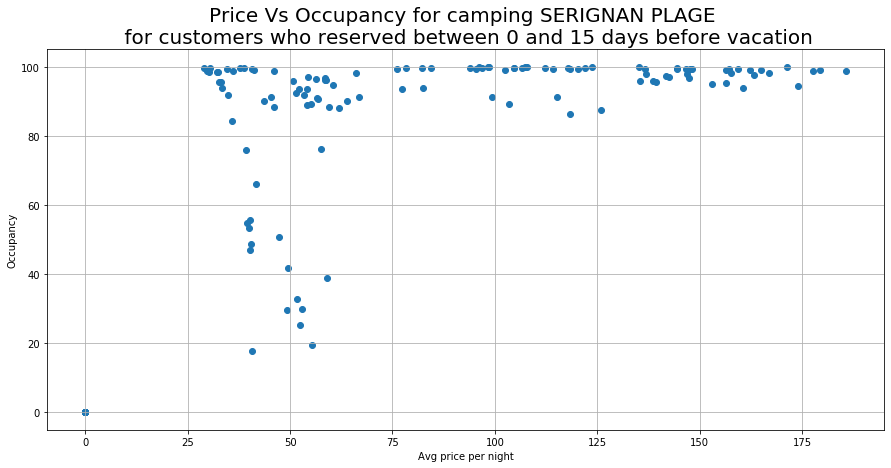

In [353]:
df_avg_price = pd.DataFrame.from_dict(dict_dates_avg_price, orient='index', columns = ['average price'])
df_occupancy = pd.DataFrame.from_dict(dict_dates_oc, orient='index', columns = ['occupancy'])

df_all = df_avg_price.merge(df_occupancy, left_index = True, right_index = True)

plt.figure(figsize=(15, 7))
plt.scatter(df_all['average price'], df_all['occupancy'])
plt.title(f'Price Vs Occupancy for camping {camping} \n \
for customers who reserved between {min_nb_days_between_booking_and_vacation} and {max_nb_days_between_booking_and_vacation} days before vacation', fontsize=20)
plt.xlabel("Avg price per night")
plt.ylabel("Occupancy")
plt.grid()